In [1]:
!kaggle datasets download -d borhanitrash/cat-dataset

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/cat-dataset
License(s): MIT
 98% 264M/268M [00:02<00:00, 110MB/s] 
100% 268M/268M [00:02<00:00, 110MB/s]


In [2]:
# prompt: unzip the above dataset

import zipfile

zip_ref = zipfile.ZipFile('/content/cat-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [3]:
# prompt: read the image in the Data folder the image are Jpg

from PIL import Image
import os

# Get the path to the data folder
data_folder = '/content/cats/Data'

# Get a list of all the files in the data folder
files = os.listdir(data_folder)

# Read the first image in the data folder
image_path = os.path.join(data_folder, files[0])
image = Image.open(image_path)

# Display the image
image.show()


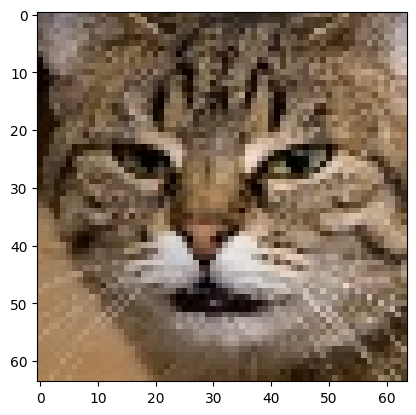

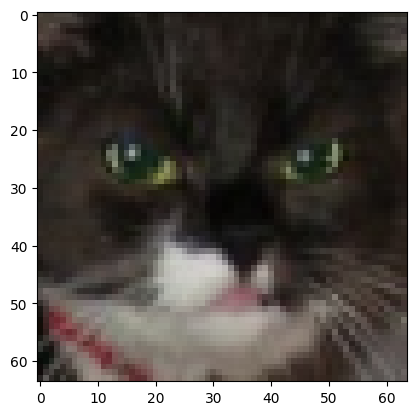

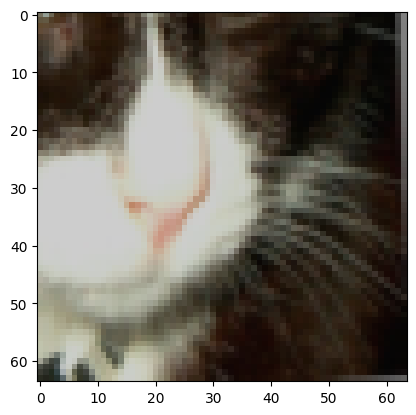

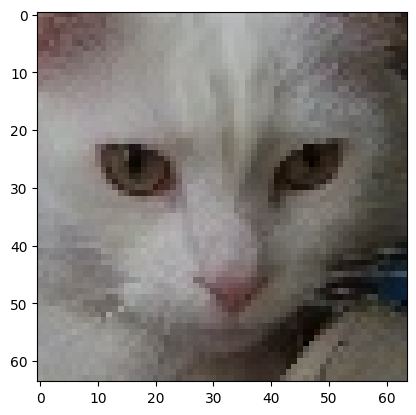

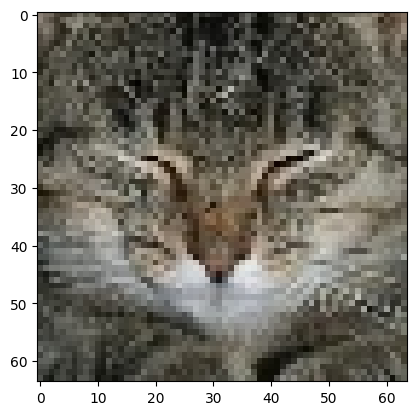

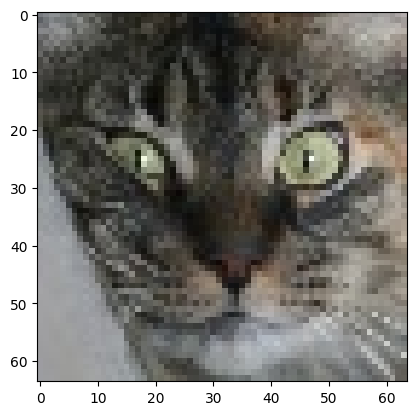

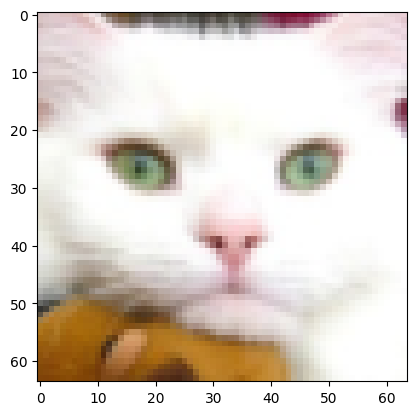

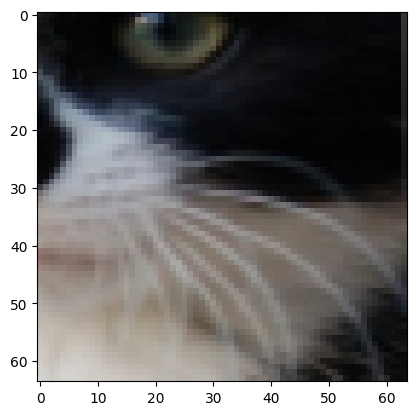

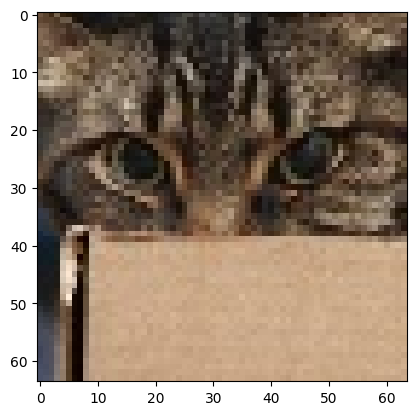

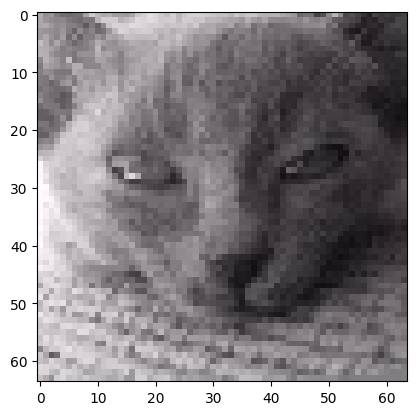

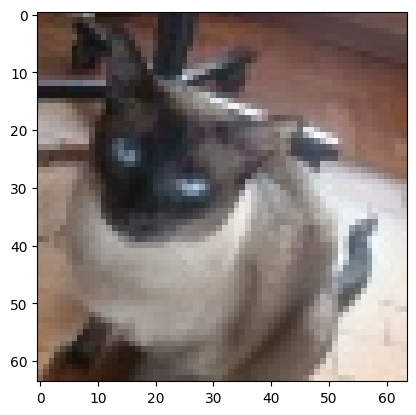

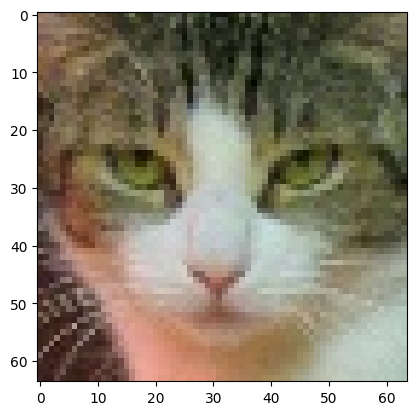

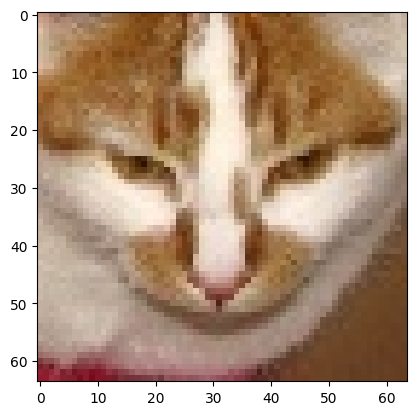

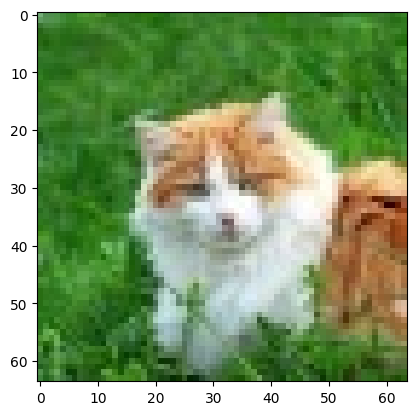

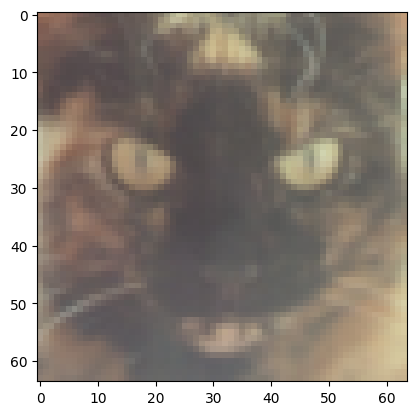

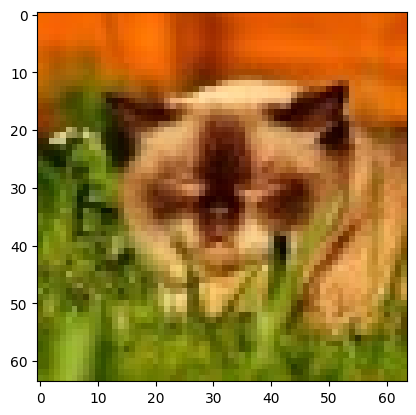

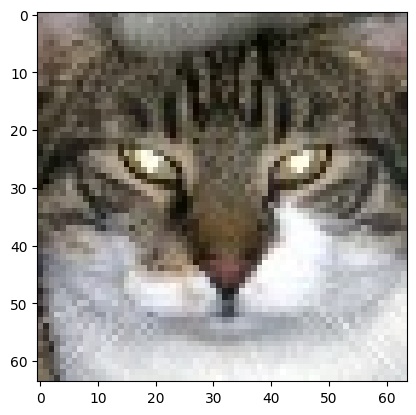

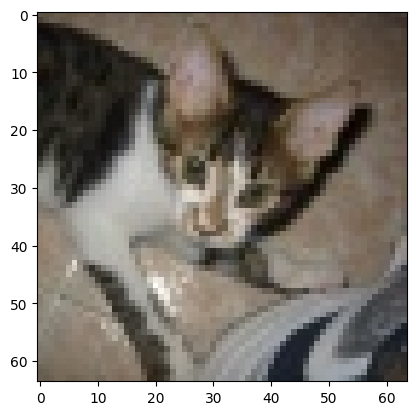

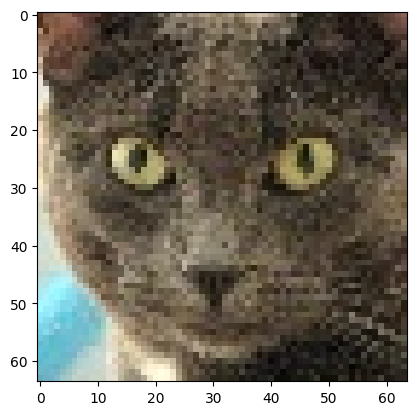

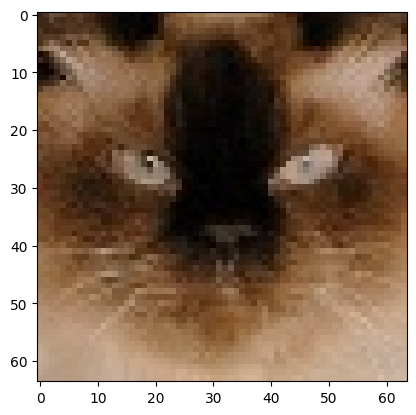

In [4]:
# prompt: print the first 20 images

import matplotlib.pyplot as plt

# Get the first 20 images from the data folder
first_20_images = files[:20]

# Iterate over the first 20 images and display them
for image_path in first_20_images:
  image_path = os.path.join(data_folder, image_path)
  image = Image.open(image_path)
  plt.imshow(image)
  plt.show()


In [5]:
import cv2
import numpy as np
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import metrics

# Resize image

(128, 64, 3)


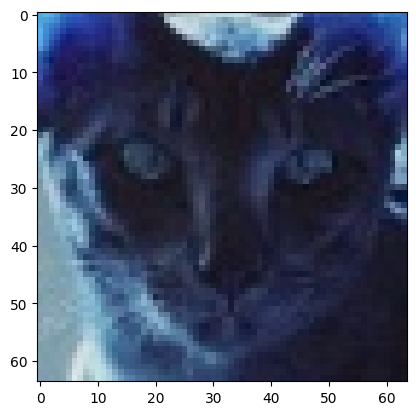

In [6]:
import cv2

# Load the image
image = cv2.imread('/content/cats/Data/cat_10013.png')

# Resize the image to a width of 64 pixels and a height of 120 pixels
resized_img = cv2.resize(image, (64, 128))

# Display the resized image
plt.imshow(image)
print(resized_img.shape)
plt.show()

# Hog Feature

(6804,)
[0.28571241 0.28571241 0.07235693 ... 0.02474382 0.02439759 0.13373896]
(64, 64, 3)


<ipython-input-7-51753053930c>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img,  visualize=True, multichannel=True)


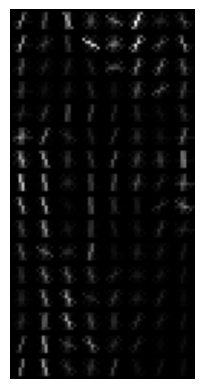

In [7]:
fd, hog_image = hog(resized_img,  visualize=True, multichannel=True)
print(fd.shape)
print(fd)
print(image.shape)
plt.axis('off')
plt.imshow(hog_image, cmap='gray')
plt.show()

# Training of Dataset

In [8]:
data_cats = []
for entry in glob.glob('/content/cats/Data/*.png'):
  img = np.array(cv2.imread(entry))
  resized_img = cv2.resize(img, (64, 128))
  fd, hog_image = hog(resized_img,  visualize=True, multichannel=True)
  data_cats.append(fd)


data = np.array(data_cats)
print(len(data))





<ipython-input-8-c9b7c6714eb3>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img,  visualize=True, multichannel=True)


29843


# Train Data Labeling

In [10]:
data_labels = []
for i in range(len(data_cats)):
  data_labels.append('cat')


print(data_labels)
print(len(data_labels))

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

In [14]:
# prompt: using KNN train the model record the scoresand accuracy,be sure to adjust the ecledian distance

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the scores and accuracy
print('Test scores:', knn.score(X_test, y_test))
print('Accuracy:', accuracy)

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)


Test scores: 1.0
Accuracy: 1.0
[[5969]]


In [13]:
# Convert the data_labels list to an array
data_labels = np.array(data_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing data and labels
print('Training data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Testing labels shape:', y_test.shape)

Training data shape: (23874, 6804)
Testing data shape: (5969, 6804)
Training labels shape: (23874,)
Testing labels shape: (5969,)
